<a href="https://colab.research.google.com/github/SujithSajeev-17/Machine_Learning/blob/main/Keyloggers_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser as dateutil
import joblib,pickle
from datetime import datetime
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.stats import uniform
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df_raw= pd.read_csv('/content/drive/MyDrive/dataset/Keylogger_Detection.csv',encoding='UTF-8')
df = df_raw

<ipython-input-3-ac8810f2909d>:1: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw= pd.read_csv('/content/drive/MyDrive/dataset/Keylogger_Detection.csv',encoding='UTF-8')


In [4]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
df.tail()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
523612,523612,10.42.0.151-106.39.169.66-52373-80-6,10.42.0.151,52373.0,106.39.169.66,80.0,6.0,30/06/2017 01:22:05,589453.0,5.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Keylogger
523613,523613,10.42.0.211-10.42.0.1-2522-53-17,10.42.0.211,2522.0,10.42.0.1,53.0,17.0,04/08/2017 12:40:03,216310.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
523614,523614,220.243.219.55-10.42.0.211-80-60995-6,10.42.0.211,60995.0,220.243.219.55,80.0,6.0,04/08/2017 09:39:08,5215688.0,2.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
523615,523615,172.217.12.138-10.42.0.211-443-52724-6,10.42.0.211,52724.0,172.217.12.138,443.0,6.0,04/08/2017 01:41:22,223370.0,16.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
523616,523616,10.42.0.211-119.146.74.33-47669-443-6,119.146.74.33,443.0,10.42.0.211,47669.0,6.0,11/07/2017 10:14:50,46579450.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Keylogger


In [6]:
df.dtypes

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port       float64
 Destination IP     object
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Class               object
Length: 86, dtype: object

In [7]:
df.dtypes.value_counts()

float64    78
object      7
int64       1
Name: count, dtype: int64

In [8]:
df.shape

(523617, 86)

In [9]:
df.columns = df.columns.str.replace(' ', '')

In [10]:
df.columns

Index(['Unnamed:0', 'FlowID', 'SourceIP', 'SourcePort', 'DestinationIP',
       'DestinationPort', 'Protocol', 'Timestamp', 'FlowDuration',
       'TotalFwdPackets', 'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount

In [11]:
df.describe()

,Unnamed:0,SourcePort,DestinationPort,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,523617.000000,523617.000000,523617.000000,523617.000000,5.236170e+05,523617.000000,523617.000000,5.236170e+05,5.236170e+05,523617.000000,...,523597.000000,5.235970e+05,5.235970e+05,5.235950e+05,5.235950e+05,5.235950e+05,5.235950e+05,5.235950e+05,5.235950e+05,5.235950e+05
mean,261808.000000,38389.622917,6222.747054,8.435195,1.116307e+07,9.475619,17.819533,1.043487e+03,2.156387e+04,215.842782,...,1.777533,-2.135277e+04,1.659947e+05,2.369898e+04,1.887055e+05,1.482351e+05,4.390550e+06,4.059862e+05,4.738970e+06,4.082014e+06
std,151155.352289,18713.642457,15681.211329,157.569965,2.307145e+07,97.897284,321.858169,5.361425e+04,4.633844e+05,369.316080,...,37.463590,5.169081e+06,9.027506e+05,3.757831e+05,1.078287e+06,8.526430e+05,1.511112e+07,3.337708e+06,1.598408e+07,1.470351e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,-1.395062e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,130904.000000,34019.000000,80.000000,6.000000,3.730600e+04,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,261808.000000,43186.000000,443.000000,6.000000,4.745050e+05,2.000000,1.000000,3.100000e+01,0.000000e+00,31.000000,...,0.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,392712.000000,52281.000000,443.000000,6.000000,1.031474e+07,6.000000,4.000000,4.620000e+02,4.140000e+02,350.000000,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,523616.000000,124560.000000,65428.000000,65812.000000,1.199967e+08,8671.000000,14993.000000,1.249095e+07,2.166097e+07,1460.000000,...,8669.000000,1.705248e+08,5.041965e+07,5.795123e+07,9.139736e+07,4.993167e+07,1.196749e+08,7.554958e+07,1.196749e+08,1.196749e+08


In [12]:
df.isna().sum()

Unnamed:0         0
FlowID            7
SourceIP          0
SourcePort        0
DestinationIP     0
                 ..
IdleMean         22
IdleStd          22
IdleMax          22
IdleMin          22
Class             0
Length: 86, dtype: int64

In [13]:
df.duplicated().sum()


0

In [14]:
df.fillna(0,inplace=True)

In [15]:
df.isna().sum()

Unnamed:0        0
FlowID           0
SourceIP         0
SourcePort       0
DestinationIP    0
                ..
IdleMean         0
IdleStd          0
IdleMax          0
IdleMin          0
Class            0
Length: 86, dtype: int64

In [16]:
df.dtypes

Unnamed:0          int64
FlowID            object
SourceIP          object
SourcePort       float64
DestinationIP     object
                  ...   
IdleMean         float64
IdleStd          float64
IdleMax          float64
IdleMin          float64
Class             object
Length: 86, dtype: object

In [17]:
df.drop(['Unnamed:0'],axis=1,inplace=True)

In [18]:
lb = LabelEncoder()
df['FlowID']= df['FlowID'].astype(str)
df['FlowID']=lb.fit_transform(df['FlowID'])
df['SourceIP']=lb.fit_transform(df['SourceIP'])
df['DestinationIP']= lb.fit_transform(df['DestinationIP'])

In [19]:
df['PacketLengthStd'] = df['PacketLengthStd'].replace('SCAREWARE', 2)
df['CWEFlagCount'] = df['CWEFlagCount'].replace('SCAREWARE', 2)
df['CWEFlagCount'] = df['CWEFlagCount'].astype(float)
df['PacketLengthStd'] = df['PacketLengthStd'].astype(float)
format_string = "%d/%m/%Y %H:%M:%S"
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format=format_string, errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df['Timestamp'] = df['Timestamp'].astype(int)

In [20]:
df['Class'].value_counts()

Class
Benign       308813
Keylogger    214799
Name: count, dtype: int64

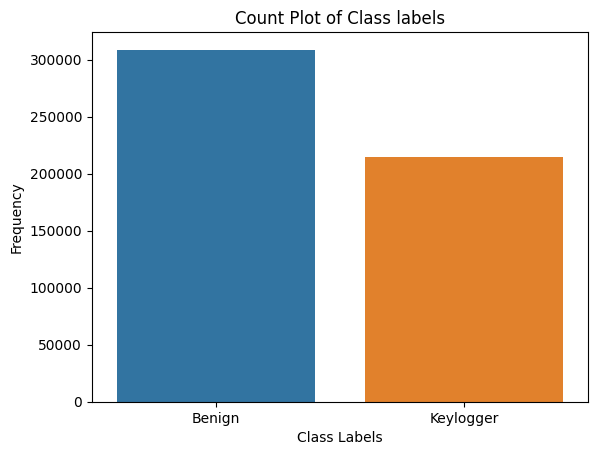

In [21]:
plt.title("Count Plot of Class labels")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
sns.countplot(x=df['Class'],data=df,hue=df['Class'])
plt.show()

In [22]:
x = df.iloc[:,:-1].values
x

array([[4.2252e+04, 6.0000e+00, 3.4451e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.9114e+04, 5.0000e+00, 5.3892e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.8944e+04, 4.9100e+02, 4.4300e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [8.9800e+04, 6.0000e+00, 6.0995e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.4039e+04, 6.0000e+00, 5.2724e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.6493e+04, 1.7900e+02, 4.4300e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [23]:
y = df.iloc[:,-1].values
y

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Keylogger'],
      dtype=object)






###**Train and Test Data Separation**

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
x_train

array([[8.0336000e+04, 5.0000000e+00, 4.3155000e+04, ..., 0.0000000e+00,
        5.5872610e+06, 5.5872610e+06],
       [1.2628000e+04, 5.0000000e+00, 3.6612000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.2785000e+04, 5.5000000e+02, 4.4300000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [6.0406000e+04, 6.0000000e+00, 4.7185000e+04, ..., 0.0000000e+00,
        7.1095211e+07, 7.1095211e+07],
       [4.5346000e+04, 6.0000000e+00, 4.7728000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6611000e+04, 7.0000000e+00, 5.9766000e+04, ..., 0.0000000e+00,
        9.0043377e+07, 9.0043377e+07]])

In [26]:
y_train

array(['Keylogger', 'Keylogger', 'Keylogger', ..., 'Keylogger', 'Benign',
       'Benign'], dtype=object)

In [27]:
x_test

array([[3.1574e+04, 6.0000e+00, 7.0490e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.5259e+04, 6.0000e+00, 4.5918e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.8285e+04, 5.0000e+00, 4.0294e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [5.2096e+04, 7.0000e+00, 4.2906e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.6618e+04, 6.0000e+00, 3.8760e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.5595e+04, 6.0000e+00, 4.3798e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [28]:
y_test

array(['Benign', 'Keylogger', 'Benign', ..., 'Keylogger', 'Keylogger',
       'Keylogger'], dtype=object)

##**Standardization**

In [29]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

##**Model Creation, Predication and Evalutaion**

###**K-Nearest Neighbors**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)



In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array(['Benign', 'Keylogger', 'Benign', ..., 'Keylogger', 'Keylogger',
       'Keylogger'], dtype=object)

In [33]:
acc_score_knn = accuracy_score(y_test,y_pred_knn)*100
acc_score_knn

99.35193908991367

In [34]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[92419,   292],
       [  726, 63647]])

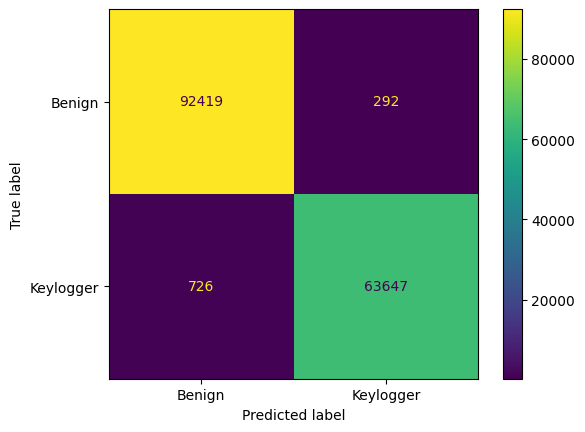

In [35]:
labels_knn = ['Benign', 'Keylogger']
cmd_knn = ConfusionMatrixDisplay(cm_knn,display_labels=labels_knn)
cmd_knn.plot()

In [36]:
report_knn =pd.DataFrame(classification_report(y_test,y_pred_knn,output_dict=True)).T
report_knn

,precision,recall,f1-score,support
Benign,0.992206,0.996850,0.994523,92711.000000
Keylogger,0.995433,0.988722,0.992066,64373.000000
accuracy,0.993519,0.993519,0.993519,0.993519
macro avg,0.993819,0.992786,0.993294,157084.000000
weighted avg,0.993528,0.993519,0.993516,157084.000000


###**Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [38]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array(['Benign', 'Keylogger', 'Benign', ..., 'Keylogger', 'Keylogger',
       'Keylogger'], dtype=object)

In [40]:
acc_score_dt = accuracy_score(y_test,y_pred_dt)*100
acc_score_dt

100.0

In [41]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
print("Confusion matrix: \n-------------\n",cm_dt)

Confusion matrix: 
-------------
 [[92711     0]
 [    0 64373]]


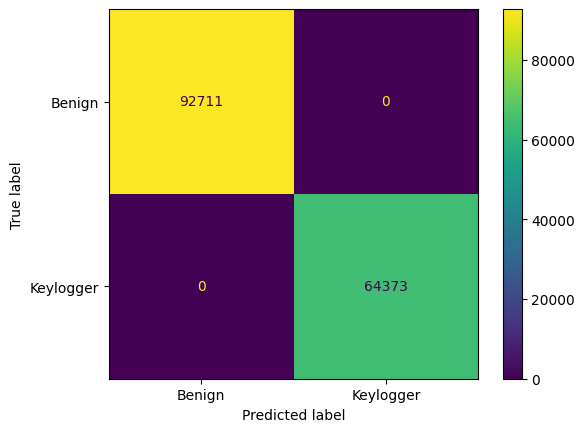

In [42]:
labels_dt =['Benign', 'Keylogger']
cmd_dt = ConfusionMatrixDisplay(cm_dt,display_labels=labels_dt)
cmd_dt.plot()

In [43]:
report_dt = pd.DataFrame(classification_report(y_test,y_pred_dt,output_dict=True)).T
report_dt

,precision,recall,f1-score,support
Benign,1.0,1.0,1.0,92711.0
Keylogger,1.0,1.0,1.0,64373.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,157084.0
weighted avg,1.0,1.0,1.0,157084.0


###**Naive Bayes**

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [45]:
nb.fit(x_train,y_train)

GaussianNB()

In [46]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array(['Keylogger', 'Keylogger', 'Keylogger', ..., 'Keylogger',
       'Keylogger', 'Keylogger'], dtype='<U9')

In [47]:
acc_score_nb = (accuracy_score(y_test, y_pred_nb) * 100)

print(acc_score_nb)

41.29573985892898


In [48]:
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_nb

array([[  511, 92200],
       [   15, 64358]])

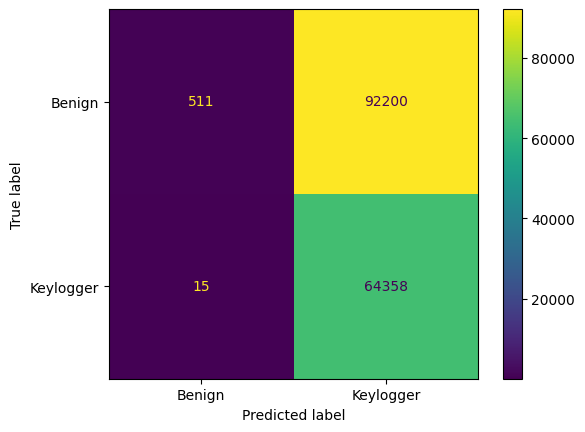

In [49]:
labels_nb =['Benign', 'Keylogger']
cmd_nb = ConfusionMatrixDisplay(cm_nb,display_labels=labels_nb)
cmd_nb.plot()

In [50]:
report_nb = pd.DataFrame(classification_report(y_test,y_pred_nb,output_dict=True)).T
report_nb

,precision,recall,f1-score,support
Benign,0.971483,0.005512,0.010961,92711.000000
Keylogger,0.411081,0.999767,0.582607,64373.000000
accuracy,0.412957,0.412957,0.412957,0.412957
macro avg,0.691282,0.502639,0.296784,157084.000000
weighted avg,0.741830,0.412957,0.245222,157084.000000


###**Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [52]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array(['Benign', 'Keylogger', 'Benign', ..., 'Keylogger', 'Keylogger',
       'Keylogger'], dtype=object)

In [54]:
acc_score_rf = (accuracy_score(y_test,y_pred_rf)*100)
print(acc_score_rf)

100.0


In [55]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
print("Confusion matrix: \n-----------------\n",cm_rf)

Confusion matrix: 
-----------------
 [[92711     0]
 [    0 64373]]


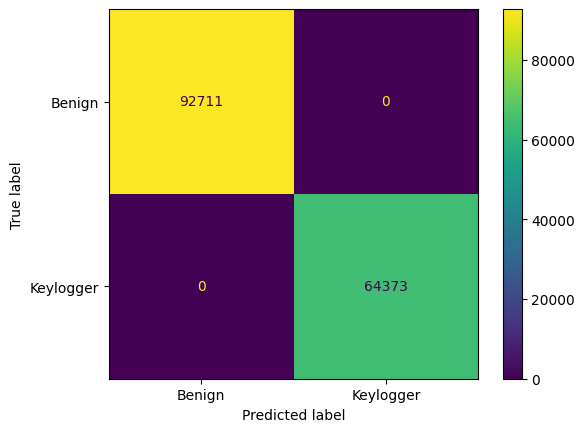

In [56]:
labels_rf =['Benign', 'Keylogger']
cmd_rf = ConfusionMatrixDisplay(cm_rf,display_labels=labels_rf)
cmd_rf.plot()

In [57]:
report_rf = pd.DataFrame(classification_report(y_test,y_pred_rf,output_dict=True)).T
report_rf

,precision,recall,f1-score,support
Benign,1.0,1.0,1.0,92711.0
Keylogger,1.0,1.0,1.0,64373.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,157084.0
weighted avg,1.0,1.0,1.0,157084.0


###**Extra Gradient Boost (XGBoost)**

In [58]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=100,random_state=42)

y_train_en= lb.fit_transform(y_train)
y_test_en = lb.fit_transform(y_test)

In [59]:
xgbc.fit(x_train,y_train_en)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [60]:
y_pred_xgbc = xgbc.predict(x_test)
y_pred_xgbc

array([0, 1, 0, ..., 1, 1, 1])

In [61]:
acc_score_xgbc = accuracy_score(y_test_en,y_pred_xgbc)*100
acc_score_xgbc

99.99172417305391

In [62]:
cm_xgbc = confusion_matrix(y_test_en,y_pred_xgbc)
cm_xgbc

array([[92701,    10],
       [    3, 64370]])

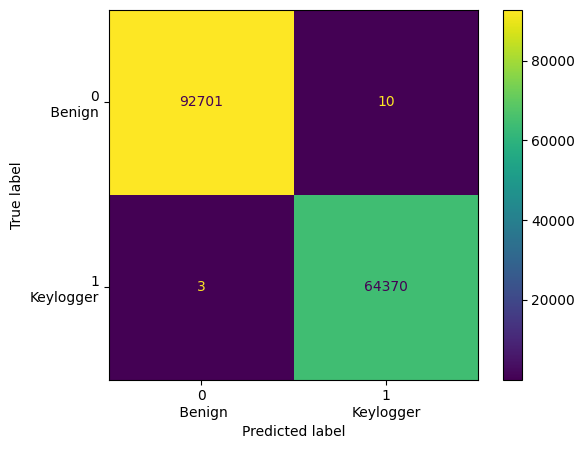

In [63]:
labels = ["0\n Benign","1\nKeylogger",]
cmd_xgbc = ConfusionMatrixDisplay(cm_xgbc,display_labels=labels)
cmd_xgbc.plot()

In [64]:
report_xgbc = pd.DataFrame(classification_report(y_test_en,y_pred_xgbc,output_dict=True)).T
report_xgbc

,precision,recall,f1-score,support
0,0.999968,0.999892,0.999930,92711.000000
1,0.999845,0.999953,0.999899,64373.000000
accuracy,0.999917,0.999917,0.999917,0.999917
macro avg,0.999906,0.999923,0.999914,157084.000000
weighted avg,0.999917,0.999917,0.999917,157084.000000


###**AdaBoost**

In [65]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [66]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [67]:
y_pred_abc = abc.predict(x_test)
y_pred_abc

array(['Benign', 'Keylogger', 'Benign', ..., 'Keylogger', 'Keylogger',
       'Keylogger'], dtype=object)

In [68]:
acc_score_abc = accuracy_score(y_test,y_pred_abc)*100
acc_score_abc

100.0

In [69]:
cm_abc = confusion_matrix(y_test,y_pred_abc)
cm_abc

array([[92711,     0],
       [    0, 64373]])

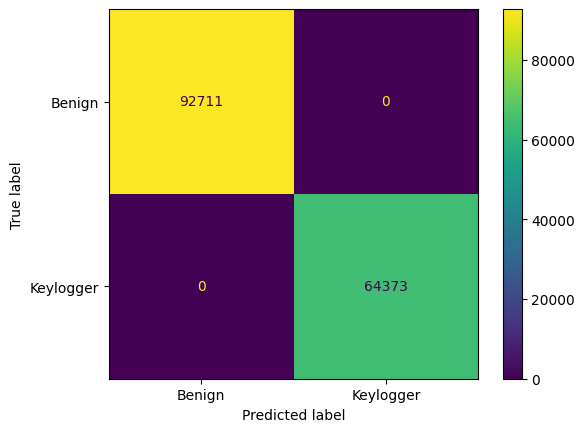

In [70]:
labels = ["Benign","Keylogger",]
cmd_abc = ConfusionMatrixDisplay(cm_abc,display_labels=labels)
cmd_abc.plot()

In [71]:
report_abc = pd.DataFrame(classification_report(y_test,y_pred_abc,output_dict=True)).T
report_abc

,precision,recall,f1-score,support
Benign,1.0,1.0,1.0,92711.0
Keylogger,1.0,1.0,1.0,64373.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,157084.0
weighted avg,1.0,1.0,1.0,157084.0


###**Visualization of Model Accuracy**

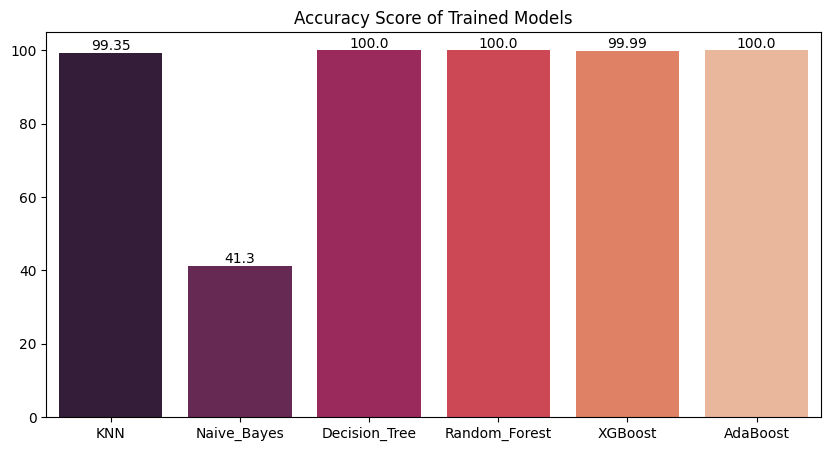

In [72]:
plt.figure(figsize=(10,5))
plt.title("Accuracy Score of Trained Models")
models = ['KNN','Naive_Bayes','Decision_Tree','Random_Forest','XGBoost','AdaBoost']
score= [acc_score_knn,acc_score_nb,acc_score_dt,acc_score_rf,acc_score_xgbc,acc_score_abc]
sns.barplot(x=models,y=score,palette='rocket',legend=False,hue=models)
for i in range(len(models)):
    plt.annotate(str(round(score[i], 2)), xy=(i, score[i]), ha='center', va='bottom')
plt.show()

In [73]:
joblib.dump(dt,"dt_model.sav")
joblib.dump(rf,"rf_model.sav")
joblib.dump(xgbc,"xgb_model.sav")
joblib.dump(abc,"Adb_mode.sav")


['Adb_mode.sav']

**K-nearest neighbors (KNN)** and **Extreme Gradient Boosting (XGBoost)** both obtained an impressive accuracy score of **99%**. On the other hand, **Decision Tree**, **Random Forest**, and **AdaBoost** all reached a perfect accuracy score of 100%.